In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

In [4]:
dt = DecisionTreeClassifier(max_depth=1)

In [5]:
df = pd.DataFrame()
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


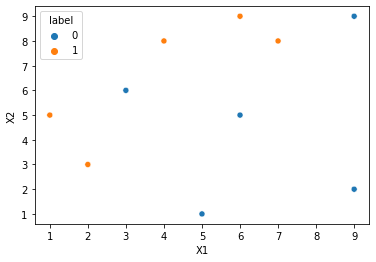

In [7]:
sns.scatterplot(df['X1'],df['X2'],hue=df['label'])
plt.show()

In [8]:
df['weights'] = 1/df.shape[0] 

In [10]:
dt.fit(df[['X1','X2']],df['label'])

DecisionTreeClassifier(max_depth=1)

In [11]:
y_pred = dt.predict(df[['X1','X2']])

In [12]:
df['y_pred'] = y_pred

In [14]:
def model_weight(error):
    return 0.5*np.log((1-error)/error)

In [16]:
alpha1 = model_weight(0.3)
alpha1

0.42364893019360184

In [20]:
def update_row_wt(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [21]:
df['updated_weights'] = df.apply(update_row_wt,axis=1)

In [24]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [30]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper']-df['normalized_weights']

In [31]:
df[['X1','X2','label','weights','y_pred','normalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.071475,0.071475,0.142950
2,3,6,0,0.1,1,0.166559,0.142950,0.309508
3,4,8,1,0.1,1,0.071475,0.309508,0.380983
4,5,1,0,0.1,0,0.071475,0.380983,0.452458
5,6,9,1,0.1,1,0.071475,0.452458,0.523933
6,6,5,0,0.1,1,0.166559,0.523933,0.690492
7,7,8,1,0.1,1,0.071475,0.690492,0.761967
8,9,9,0,0.1,1,0.166559,0.761967,0.928525
9,9,2,0,0.1,0,0.071475,0.928525,1.000000


In [33]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper']>a and row['cumsum_lower']<a:
                indices.append(index)
    return indices

In [35]:
index_values = create_new_dataset(df)
index_values

[4, 3, 2, 6, 5, 6, 8, 7, 3, 6]

In [39]:
df1 = df.iloc[index_values,[0,1,2,3]] 
df1

,X1,X2,label,weights
4,5,1,0,0.1
3,4,8,1,0.1
2,3,6,0,0.1
6,6,5,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
8,9,9,0,0.1
7,7,8,1,0.1
3,4,8,1,0.1
6,6,5,0,0.1


In [ ]:
def Adaboost_decision(df):
    dt = DecisionTreeClassifier(max_depth=1)
    df['weights'] = 1/df.shape[0]
    dt.fit(df[['X1','X2']],df['label'])
    y_pred = dt.predict(df[['X1','X2']])
    df['y_pred'] = y_pred
    error = 1 - 